In [ ]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Define the class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

**CNN MODEL**

In [ ]:
# Create a CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 92ms/step - accuracy: 0.3306 - loss: 1.7996 - val_accuracy: 0.5154 - val_loss: 1.3447
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - accuracy: 0.5586 - loss: 1.2416 - val_accuracy: 0.5989 - val_loss: 1.1321
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 94ms/step - accuracy: 0.6226 - loss: 1.0719 - val_accuracy: 0.6303 - val_loss: 1.0337
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 89ms/step - accuracy: 0.6623 - loss: 0.9698 - val_accuracy: 0.6644 - val_loss: 0.9516
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.6896 - loss: 0.8893 - val_accuracy: 0.6763 - val_loss: 0.9287
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 85s 93ms/step - accuracy: 0.7160 - loss: 0.8185 - val_accuracy: 0.6936 - val_loss: 0.8872
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 90ms/step - accuracy: 0.7331 - loss: 0.7659 - val_accuracy: 0.6923 - val_loss: 0.9207
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.7471 - loss: 0.7251 - 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

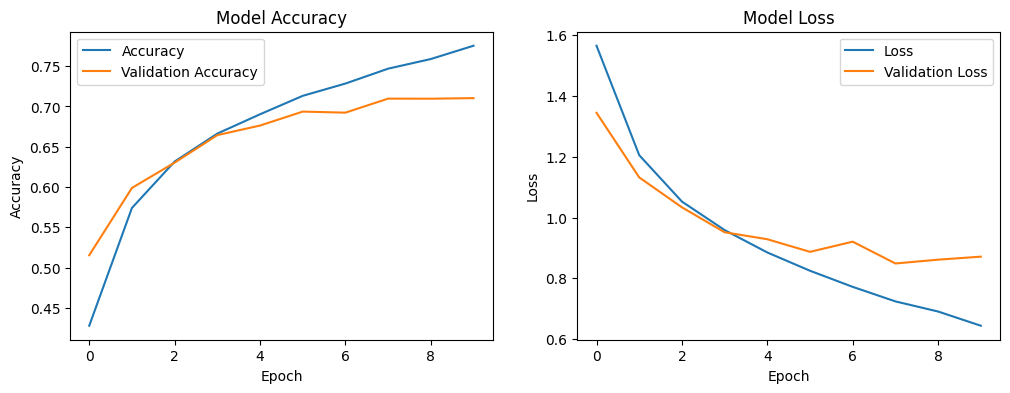

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

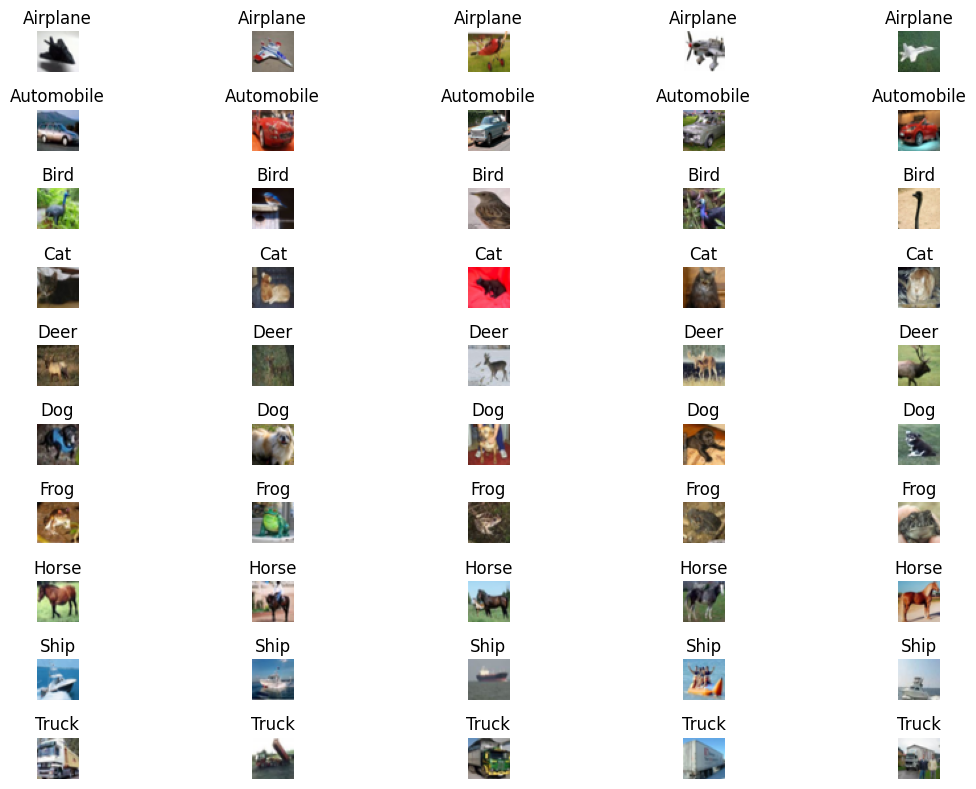

In [ ]:
# Visualize a few images from each class
import numpy as np

def plot_classes(x_train, y_train, class_names):
    plt.figure(figsize=(12, 8))

    for i in range(len(class_names)):
        # Get indices for images of the current class
        indices = np.where(y_train == i)[0][:5]  # Take 5 images for each class
        for j, idx in enumerate(indices):
            plt.subplot(len(class_names), 5, i * 5 + j + 1)  # Arrange images in a grid
            plt.imshow(x_train[idx])
            plt.axis('off')  # Turn off axis
            plt.title(class_names[i])  # Set title to the class name

    plt.tight_layout()
    plt.show()

# Call the function to plot classes
plot_classes(x_train, y_train, class_names)


In [ ]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train_rnn, y_train_rnn), (x_test_rnn, y_test_rnn) = cifar10.load_data()


In [ ]:
# Normalize the pixel values to be between 0 and 1
x_train_rnn = x_train_rnn.astype('float32') / 255.0
x_test_rnn = x_test_rnn.astype('float32') / 255.0

# Reshape the data to fit the RNN input shape
# Shape: (num_samples, timesteps, features)
# Here, we consider each row of pixels (32 rows) as a timestep and each pixel as a feature (3 features for RGB)
x_train_rnn_reshaped = x_train_rnn.reshape(x_train_rnn.shape[0], x_train_rnn.shape[1], -1)  # (num_samples, 32, 96)
x_test_rnn_reshaped = x_test_rnn.reshape(x_test_rnn.shape[0], x_test_rnn.shape[1], -1)      # (num_samples, 32, 96)

**RNN MODEL**

In [ ]:
# Create an RNN model
rnn_model = models.Sequential([
    layers.SimpleRNN(64, input_shape=(32, 96), return_sequences=True),
    layers.SimpleRNN(64),
    layers.Dense(10, activation='softmax')
])

# Compile the model
rnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
rnn_history = rnn_model.fit(x_train_rnn_reshaped, y_train_rnn, epochs=10, batch_size=64, validation_data=(x_test_rnn_reshaped, y_test_rnn))

# Evaluate the model
test_loss_rnn, test_acc_rnn = rnn_model.evaluate(x_test_rnn_reshaped, y_test_rnn, verbose=2)
print(f'\nTest accuracy (RNN): {test_acc_rnn}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.2279 - loss: 2.0868 - val_accuracy: 0.3168 - val_loss: 1.8723
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.3019 - loss: 1.8916 - val_accuracy: 0.3371 - val_loss: 1.7818
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.3266 - loss: 1.8255 - val_accuracy: 0.3422 - val_loss: 1.8057
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step - accuracy: 0.3505 - loss: 1.7699 - val_accuracy: 0.3414 - val_loss: 1.7651
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.3552 - loss: 1.7400 - val_accuracy: 0.3583 - val_loss: 1.7301
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.3314 - loss: 1.8113 - val_accuracy: 0.3506 - val_loss: 1.7516
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - accuracy: 0.3583 - loss: 1.7468 - val_accuracy: 0.3828 - val_loss: 1.6764
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.3735 - loss: 1.7075 - 

In [ ]:
rnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 32, 64)              │          10,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,632 (225.13 KB)

 Trainable params: 19,210 (75.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 38,422 (150.09 KB)

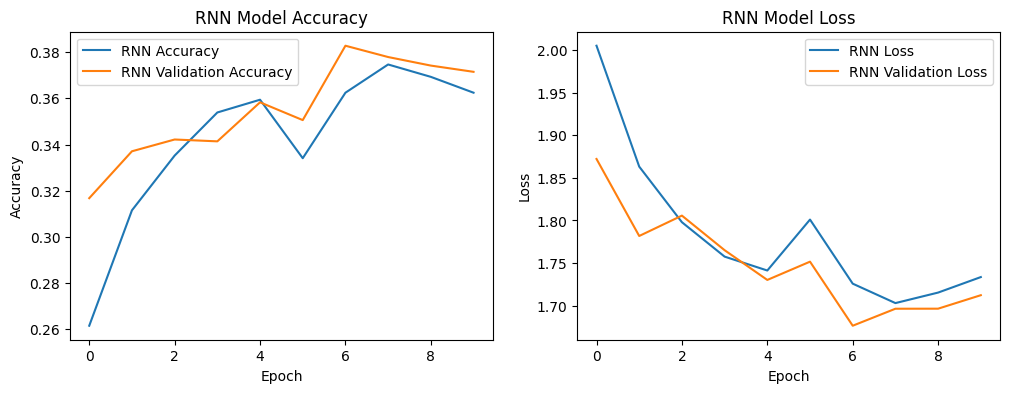

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'], label='RNN Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'], label='RNN Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

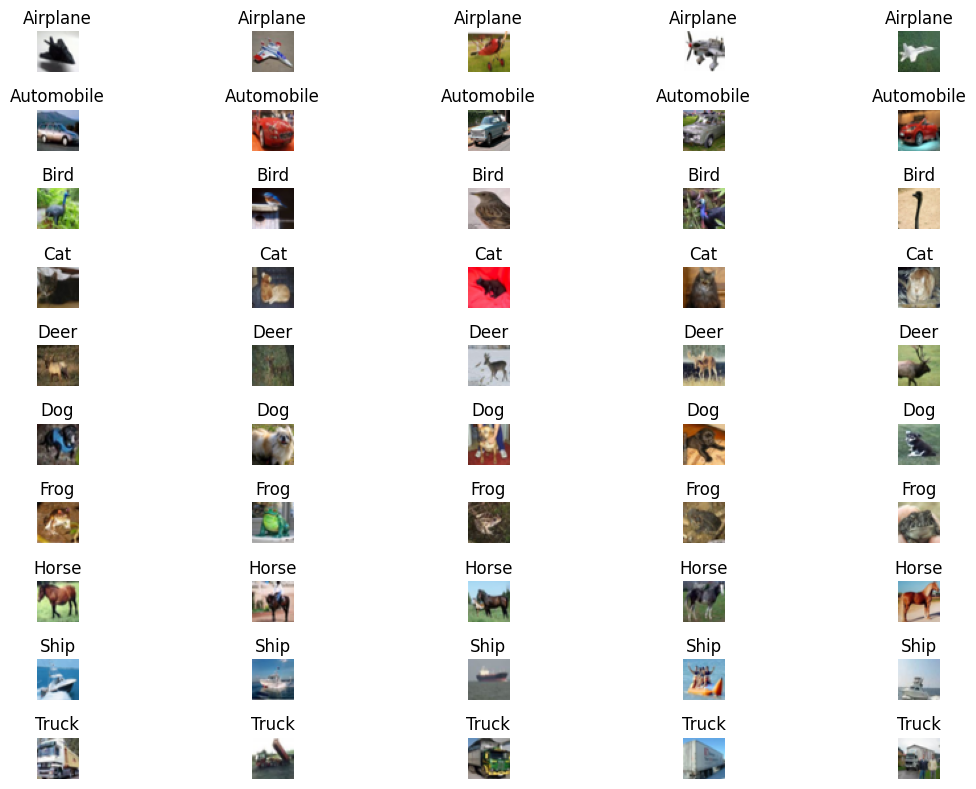

In [ ]:
# Visualize a few images from each class
import numpy as np

def plot_classes(x_train, y_train, class_names):
    plt.figure(figsize=(12, 8))

    for i in range(len(class_names)):
        # Get indices for images of the current class
        indices = np.where(y_train == i)[0][:5]  # Take 5 images for each class
        for j, idx in enumerate(indices):
            plt.subplot(len(class_names), 5, i * 5 + j + 1)  # Arrange images in a grid
            plt.imshow(x_train[idx])
            plt.axis('off')  # Turn off axis
            plt.title(class_names[i])  # Set title to the class name

    plt.tight_layout()
    plt.show()

# Call the function to plot classes
plot_classes(x_train_rnn, y_train_rnn, class_names)

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
# تحميل بيانات CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# تحويل الصور إلى شكل مسطح (لأن Decision Tree لا يتعامل مع البيانات ثلاثية الأبعاد)
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# تهيئة وتصنيف نموذج Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_flat, y_train.ravel())

# توقع وتحليل النتائج
y_pred = dt_model.predict(x_test_flat)
accuracy = accuracy_score(y_test, y_pred)

print("Decision Tree Test Accuracy:", accuracy)

Decision Tree Test Accuracy: 0.2663
